In [7]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel

In [8]:
nsteps=500
nagents=20
P = []
for i in range(nagents):
    arr = []
    for j in range(nagents):
        arr.append(-1)
    P.append(arr)
neighbors = neighbors.totally_connected(nagents, self_connected=True)
#neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
opinions = [[np.random.rand(), np.random.rand()] for i in range(nagents)]
#Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
pots = [potentials.french() for i in range(nagents)]
coupling = [[0,0],[0,0]] #the inverse of these values is what has effects. So matrices of large values would be similar to no coupling.
model = OpinionModel(nagents, neighbors, opinions, pots, coupling)

In [9]:
model.ALPHA = .01
model.run(nsteps)

In [10]:
agent_opinion = model.datacollector.get_agent_vars_dataframe()

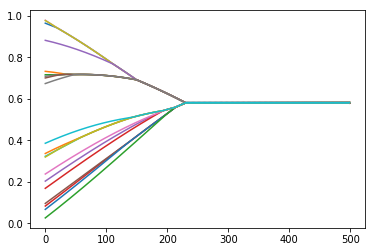

In [11]:
x=agent_opinion.Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x)

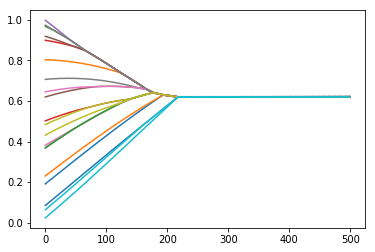

In [12]:
y=agent_opinion.Opinion1.as_matrix().reshape((nsteps, nagents))
plt.plot(y)